# Unsupervised Learning

This notebook explores **Unsupervised Learning**, focusing on two major techniques:
1. **Clustering Algorithms**
2. **Dimensionality Reduction**

We will use real-world datasets and Python implementations to understand these concepts. Hands-on examples and visualizations will enhance your understanding.

---

## Table of Contents:
1. **Clustering Algorithms**
    - k-Means Clustering
    - Hierarchical Clustering
    - DBSCAN
2. **Dimensionality Reduction**
    - Principal Component Analysis (PCA)
    - t-SNE
    - Singular Value Decomposition (SVD)
3. **Comparison of Methods**


# 1. Clustering Algorithms

Clustering algorithms group similar data points into clusters. Unlike supervised learning, clustering does not rely on labeled data.

---

## 1.1 k-Means Clustering

### What is k-Means?

- **Goal**: Partition data into `k` clusters by minimizing intra-cluster variance.
- **Applications**: Customer segmentation, image compression, pattern recognition.

---

### Key Parameters:
1. **n_clusters**: Number of clusters.
2. **init**: Method for initialization (`'k-means++'` for optimal initialization).
3. **max_iter**: Maximum number of iterations.
4. **random_state**: Ensures reproducibility.

---

### Steps:
1. Initialize `k` centroids randomly.
2. Assign each point to the nearest centroid.
3. Recompute centroids as the mean of points in each cluster.
4. Repeat until convergence or maximum iterations.

---

### Limitations:
- Sensitive to the initial position of centroids.
- Assumes spherical clusters with equal variance.


C:\Users\BRC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


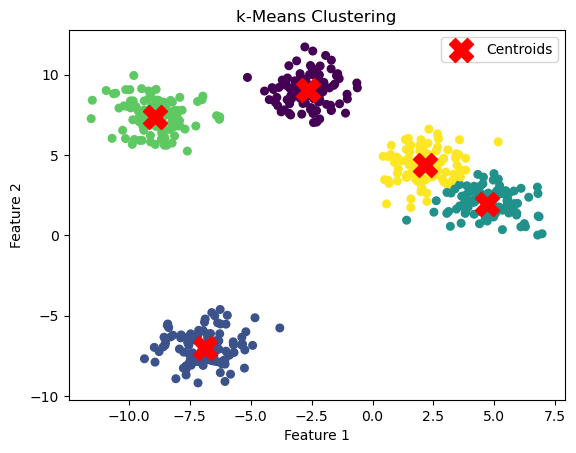

In [3]:
import os
os.environ['OMP_NUM_THREADS'] = '2'  # Set to avoid memory leak on Windows with MKL

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate synthetic dataset
X, y = make_blobs(n_samples=500, centers=5, cluster_std=1.0, random_state=42)

# Apply k-Means with explicit n_init
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Visualize clusters
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', s=30)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.title("k-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


# k-Means Clustering

This script demonstrates the use of the **k-Means clustering algorithm** to group a synthetic dataset into 5 clusters. The dataset, generated using `make_blobs`, contains 500 data points distributed across 5 centers with a standard deviation of 1.0. The `KMeans` model is initialized with the following parameters:

- **`n_clusters=5`**: Specifies the number of clusters to create.
- **`init='k-means++'`**: Ensures optimal initial placement of centroids.
- **`n_init=10`**: Runs the algorithm 10 times with different initializations to find the best result.
- **`random_state=42`**: Ensures reproducibility of the results.
- **`max_iter=300`**: Sets the maximum number of iterations for convergence.

The algorithm assigns each data point to a cluster and computes the centroids. In the resulting scatter plot:
- Each point is colored according to its cluster assignment.
- Red 'X' markers indicate the centroids of each cluster.
- The plot demonstrates the algorithm's ability to identify distinct clusters, with clear separation between groups, validating the effectiveness of k-Means in finding underlying patterns in the data.


---

## Elbow Method to Determine Optimal Clusters
The **Elbow Method** helps determine the optimal number of clusters (`k`). It calculates the **within-cluster sum of squares (WCSS)** for different `k` values and plots them.

Look for the "elbow" point in the plot where WCSS starts decreasing less significantly.


C:\Users\BRC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\BRC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\BRC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\BRC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with M

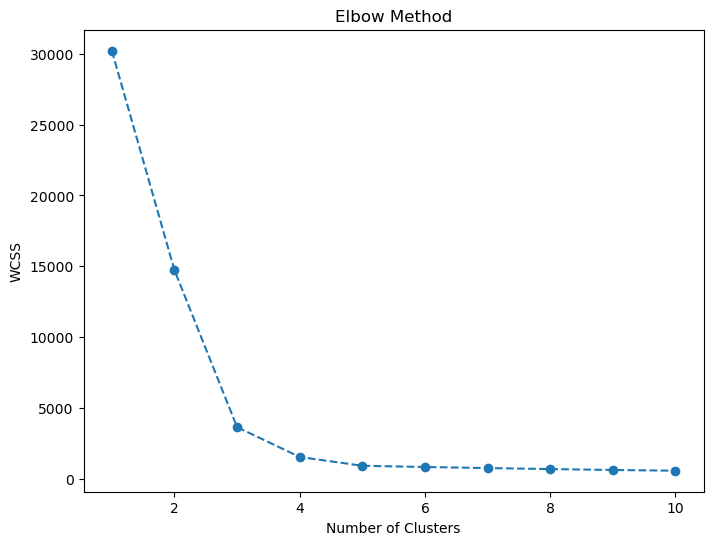

In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Limit threads to avoid memory leaks on Windows
os.environ["OMP_NUM_THREADS"] = "2"

# Generate synthetic dataset
X, y = make_blobs(n_samples=500, centers=5, cluster_std=1.0, random_state=42)

# Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()


# Elbow Method for Optimal Cluster Selection

This script applies the **Elbow Method** to determine the optimal number of clusters for the **k-Means clustering algorithm**. The steps are as follows:

1. **Dataset Generation**: 
   - A synthetic dataset is created using `make_blobs` with 500 data points, 5 centers, and a standard deviation of 1.0. A fixed random state ensures reproducibility.

2. **Within-Cluster Sum of Squares (WCSS)**:
   - The **WCSS** is computed for k-Means clustering with the number of clusters (`k`) varying from 1 to 10. WCSS measures the sum of squared distances between each data point and its assigned cluster centroid, indicating how well the clusters fit the data.

3. **Elbow Curve Plot**:
   - The WCSS values are plotted against the number of clusters (`k`). The plot helps identify the "elbow point," where the reduction in WCSS slows significantly. This point suggests the optimal number of clusters.

### Observations:
- In the Elbow Method plot, the x-axis represents the number of clusters, and the y-axis represents the WCSS.
- The "elbow point" typically indicates the ideal number of clusters, where adding more clusters does not significantly improve the fit. In this dataset, the elbow is clearly visible around **k = 5**, matching the true number of centers in the synthetic data.

This method is a visual and effective way to determine the number of clusters before applying k-Means.


## 1.2 Hierarchical Clustering

### What is Hierarchical Clustering?

Hierarchical clustering builds a tree of clusters (dendrogram). It can be:
1. **Agglomerative**: Start with individual points and merge them iteratively.
2. **Divisive**: Start with one cluster and split it iteratively.

---

### Steps:
1. Compute distances between all pairs of points.
2. Merge the closest two clusters.
3. Repeat until all points are in a single cluster.

---

### Key Parameters:
1. **linkage**: Method to compute distances (`ward`, `complete`, `average`).
2. **affinity**: Metric to compute distances (`euclidean`, `manhattan`).

---

### Dendrograms:
A dendrogram visualizes the hierarchical clustering process. The vertical axis represents the distance or dissimilarity between clusters.


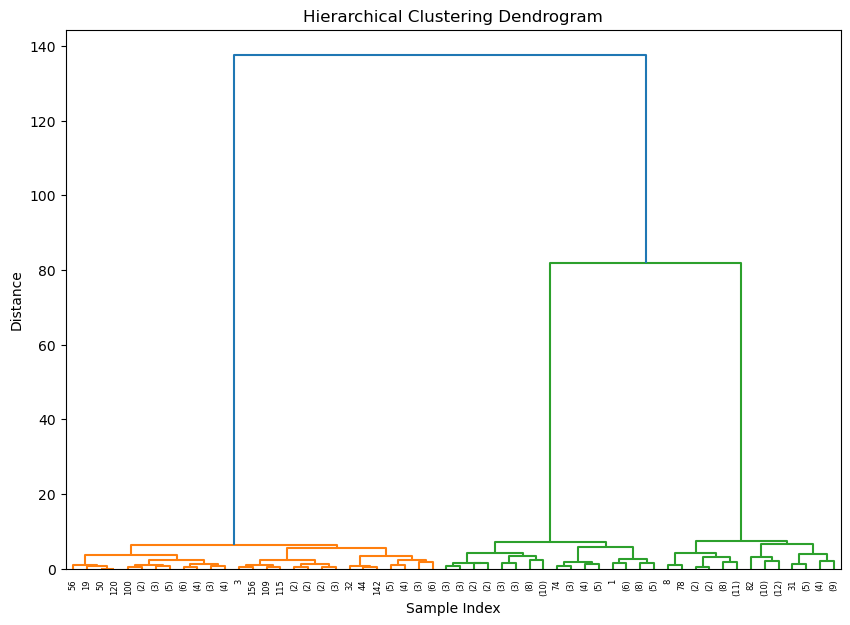

In [8]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import make_blobs

# Generate dataset
X, _ = make_blobs(n_samples=200, centers=3, cluster_std=0.8, random_state=42)

# Perform Hierarchical Clustering
linked = linkage(X, method='ward')

# Plot Dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='level', p=5)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()


# Hierarchical Clustering and Dendrogram

This script demonstrates the use of **Hierarchical Clustering** and visualizes the results using a dendrogram. Hierarchical clustering groups data into a tree-like structure, showing the relationships between data points at different levels of granularity.

---

## Steps in the Script:
1. **Dataset Generation**:
   - A synthetic dataset is created using `make_blobs` with 200 samples, 3 centers, and a standard deviation of 0.8. A fixed random state ensures reproducibility.

2. **Linkage Matrix**:
   - The `linkage` function computes the hierarchical clustering of the data using the **Ward method**. This method minimizes the variance within clusters when merging.

3. **Dendrogram**:
   - The `dendrogram` function generates a hierarchical tree structure. The parameters:
     - **`truncate_mode='level'`** limits the depth of the dendrogram to improve readability.
     - **`p=5`** restricts the plot to the last 5 merged clusters.

---

## Observations:
- The x-axis represents the sample indices or merged clusters.
- The y-axis represents the distance or dissimilarity between clusters when merging.
- The dendrogram shows how clusters are formed iteratively. 
- By cutting the dendrogram at a certain height, you can determine the desired number of clusters. For this dataset, the clusters can be split into 3 groups, aligning with the true centers of the data.

Hierarchical clustering provides insight into the hierarchical structure of the data, making it useful for exploratory data analysis.


## 1.3 DBSCAN

### What is DBSCAN?

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) clusters data based on density and handles noise effectively.

---

### Parameters:
1. **eps**: Maximum distance for points in a neighborhood.
2. **min_samples**: Minimum points required to form a cluster.

---

### Advantages:
- Handles noise and outliers.
- Works well with arbitrary-shaped clusters.


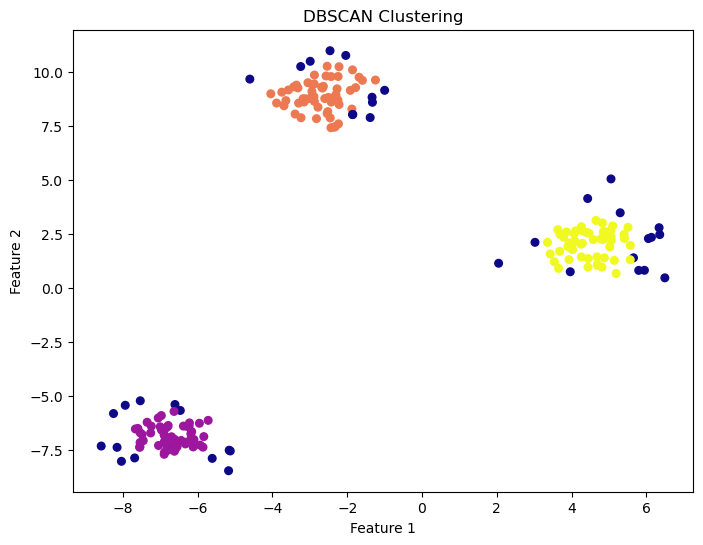

In [9]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
y_dbscan = dbscan.fit_predict(X)

# Visualize clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_dbscan, cmap='plasma', s=30)
plt.title("DBSCAN Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


# DBSCAN Clustering

This script demonstrates the use of **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**, an unsupervised learning algorithm that identifies clusters based on data density. DBSCAN is especially useful for datasets with irregularly shaped clusters and noise.

---

## Key Parameters of DBSCAN:
1. **`eps` (Epsilon)**:
   - The maximum distance between two points for them to be considered as part of the same neighborhood.
   - In this script, `eps=0.5`.

2. **`min_samples`**:
   - The minimum number of points required to form a dense region (core point).
   - Here, `min_samples=5`.

---

## Steps in the Script:
1. **Apply DBSCAN**:
   - The DBSCAN model is fitted to the dataset, and the cluster assignments are obtained using `fit_predict`.
   - Outliers or noise points are labeled as `-1`.

2. **Visualize Clusters**:
   - A scatter plot displays the clusters, where:
     - Points belonging to a cluster are colored based on their cluster labels.
     - Noise points are typically colored differently (e.g., in this case, with label `-1`).

---

## Observations:
- The x-axis and y-axis represent the features of the data.
- Each cluster is displayed in a distinct color, while noise points are labeled separately (e.g., often displayed in a different color or black).
- DBSCAN effectively identifies clusters of arbitrary shape and handles noise, making it robust for exploratory data analysis in complex datasets.

DBSCAN's ability to detect noise and non-linear clusters distinguishes it from other clustering algorithms like k-Means.


# 2. Dimensionality Reduction

Dimensionality reduction simplifies high-dimensional data while preserving key patterns. This makes visualization easier and improves model performance.

---

## 2.1 Principal Component Analysis (PCA)

### What is PCA?

PCA transforms data into new coordinates (principal components) that maximize variance.

---

### Steps:
1. Standardize the dataset.
2. Compute covariance matrix.
3. Compute eigenvectors and eigenvalues.
4. Select top eigenvectors as principal components.


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate synthetic dataset
X, y = make_blobs(n_samples=500, centers=5, cluster_std=1.0, random_state=42)

# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualize reduced data
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', s=30)
plt.title("PCA Visualization")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Cluster Label')
plt.show()


# Principal Component Analysis (PCA) Visualization

This script demonstrates the use of **Principal Component Analysis (PCA)** for dimensionality reduction. PCA transforms high-dimensional data into a lower-dimensional space while retaining the maximum variance in the data.

---

## Steps in the Script:
1. **Dataset Generation**:
   - A synthetic dataset with 500 samples, 5 centers, and a standard deviation of 1.0 is created using `make_blobs`.

2. **Standardization**:
   - Features are scaled using `StandardScaler` to ensure that each feature contributes equally to the PCA transformation.

3. **Apply PCA**:
   - PCA reduces the dataset from its original dimensionality (higher than 2) to 2 principal components. These components are linear combinations of the original features, capturing the maximum variance.

4. **Visualization**:
   - The 2D representation of the data is visualized in a scatter plot:
     - Each point represents a sample in the reduced space.
     - The color of each point corresponds to its true cluster label, aiding interpretation.
     - A colorbar is included to relate cluster labels to the plot.

---

## Observations:
- The x-axis and y-axis represent the first and second principal components, respectively.
- PCA effectively captures the structure of the data, allowing for clear visualization of the clusters.
- Clusters are visible in the 2D space, and their separation aligns with the original cluster labels, indicating that PCA retains the core patterns of the data.

PCA is a powerful technique for data exploration and visualization, particularly when working with high-dimensional datasets.


## 2.2 t-SNE

### What is t-SNE?

t-SNE is a non-linear method that preserves the local structure of high-dimensional data.


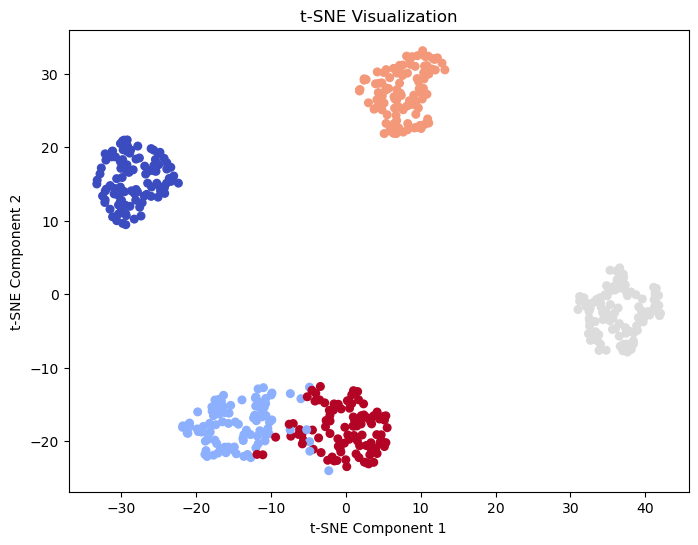

In [12]:
from sklearn.manifold import TSNE

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Visualize reduced data
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='coolwarm', s=30)
plt.title("t-SNE Visualization")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()


# t-SNE Visualization

This script demonstrates the use of **t-Distributed Stochastic Neighbor Embedding (t-SNE)**, a non-linear dimensionality reduction technique, for visualizing high-dimensional data in 2D.

---

## Key Characteristics of t-SNE:
1. **Preserves Local Structure**:
   - Unlike PCA, t-SNE emphasizes maintaining the local relationships between data points, making it particularly useful for cluster visualization.

2. **Non-linear Transformation**:
   - t-SNE maps high-dimensional data into a lower-dimensional space using probabilistic techniques.

---

## Steps in the Script:
1. **Standardization**:
   - The data is standardized using `StandardScaler` to ensure all features contribute equally.

2. **Apply t-SNE**:
   - The dataset is reduced to 2 dimensions (`n_components=2`) using t-SNE.
   - A fixed random state (`random_state=42`) ensures reproducibility.

3. **Visualization**:
   - The 2D embedding produced by t-SNE is visualized in a scatter plot:
     - Each point represents a sample in the reduced space.
     - The color of each point corresponds to its true cluster label for easy interpretation.

---

## Observations:
- The x-axis and y-axis represent the first and second t-SNE components, respectively.
- t-SNE captures the local cluster structure, making clusters visually distinct.
- Unlike PCA, t-SNE is well-suited for datasets with complex, non-linear relationships.

t-SNE is widely used for data exploration, particularly for datasets with high-dimensional features and non-linear patterns, as it provides an intuitive visual representation of clusters and relationships.


## 2.3 Singular Value Decomposition (SVD)

### What is SVD?

SVD factorizes a matrix into three matrices (U, Σ, V^T) and can reduce dimensionality.


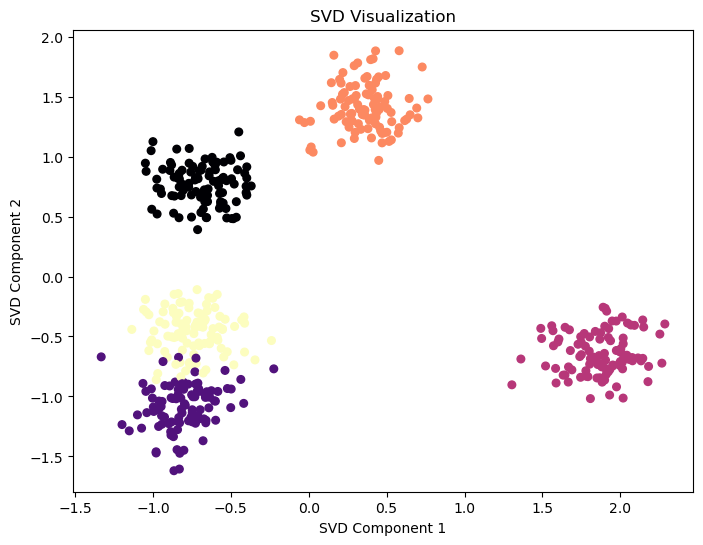

In [13]:
from sklearn.decomposition import TruncatedSVD

# Perform SVD
svd = TruncatedSVD(n_components=2)
X_svd = svd.fit_transform(X_scaled)

# Visualize reduced data
plt.figure(figsize=(8, 6))
plt.scatter(X_svd[:, 0], X_svd[:, 1], c=y, cmap='magma', s=30)
plt.title("SVD Visualization")
plt.xlabel("SVD Component 1")
plt.ylabel("SVD Component 2")
plt.show()


# SVD Visualization

This script demonstrates the use of **Singular Value Decomposition (SVD)**, a linear dimensionality reduction technique, to visualize high-dimensional data in 2D.

---

## Key Characteristics of SVD:
1. **Linear Dimensionality Reduction**:
   - SVD is a matrix factorization method that decomposes the original data matrix into three components, capturing the variance in the data along the principal directions.

2. **Orthogonal Transformation**:
   - The data is projected into a lower-dimensional space that maximizes variance in the dataset.

3. **Difference from PCA**:
   - While PCA and SVD are mathematically related, SVD is used for general matrix decomposition, while PCA specifically looks for the directions (principal components) that explain the most variance in the data.

---

## Steps in the Script:
1. **Standardization**:
   - The data is standardized using `StandardScaler` to ensure that all features are on a comparable scale.

2. **Apply SVD**:
   - The dataset is reduced to 2 dimensions (`n_components=2`) using Truncated SVD.
   - The transformation focuses on capturing the most significant singular values in the data.

3. **Visualization**:
   - The 2D embedding produced by SVD is visualized in a scatter plot:
     - Each point represents a sample in the reduced space.
     - The color of each point corresponds to its true cluster label, providing insight into cluster distribution.

---

## Observations:
- The x-axis and y-axis represent the first and second SVD components, respectively.
- SVD captures the variance in the data and projects it onto the most important components, which are then visualized in 2D.
- The visualization helps identify how well the data clusters are separated along the two principal components extracted by SVD.

SVD is widely used in fields like natural language processing (e.g., Latent Semantic Analysis) and for matrix factorization in collaborative filtering for recommendation systems.


# 3. Comparison of Methods

Each method has strengths and weaknesses:
- **k-Means**: Fast, requires `k`, struggles with irregular shapes.
- **Hierarchical Clustering**: Builds tree, good for small datasets.
- **DBSCAN**: Handles noise and arbitrary shapes.
- **PCA**: Linear reduction, interpretable.
- **t-SNE**: Non-linear, great for visualization.
- **SVD**: Handles sparse matrices effectively.
